Send an email if you want raw datas  
extract data with its default name `faces.mat` in `__data__` directory

In [1]:
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
 class PCA():
    def __init__(self, n_components):
        self._n_components = n_components

    def fit(self, X):
        mean_removed_X = X - X.mean(axis=0)
        covariance_matrix = np.cov(mean_removed_X , rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Select the first n_components, eigen values[0] is for vectors[:, 0]
        eigenvalues = eigenvalues[:self._n_components]
        eigenvectors = eigenvectors[:, :self._n_components]

        self._components = eigenvectors
        self._singular_values = eigenvalues

    def transform(self, X):
        # Project the data onto principal components
        return X @ self._components

In [3]:
data = sio.loadmat('./__data__/faces.mat')
faces = data['faces'].T

X, X_test = train_test_split(faces, test_size=0.3, shuffle=False) 

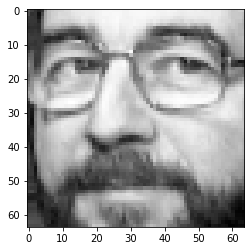

In [4]:
plt.imshow(X[-1].reshape(64,64).T, cmap='gray')
plt.show()

In [49]:
pca = PCA(n_components=200)
pca.fit(X)

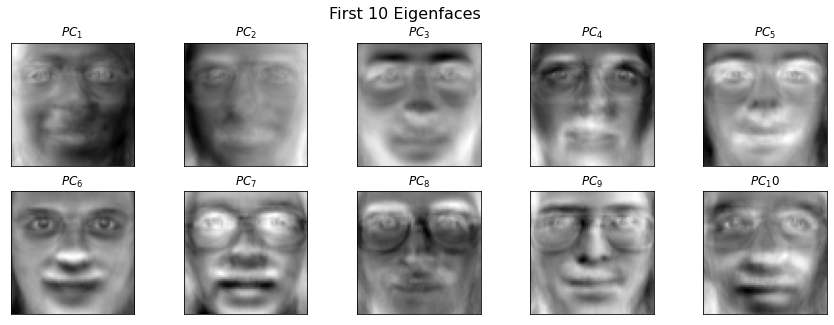

In [63]:
def vector2image(vector):
    return vector.reshape(64,64).T

eigen_faces = np.real(pca._components)
fig, axs = plt.subplots(figsize=(15,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.set_title(f"$PC_{str(i+1)}$")
    plt.imshow(vector2image(eigen_faces[:,i]), cmap='gray')
    plt.xticks([])
    plt.yticks([])
fig.suptitle("First 10 Eigenfaces", fontsize=16)
plt.show()

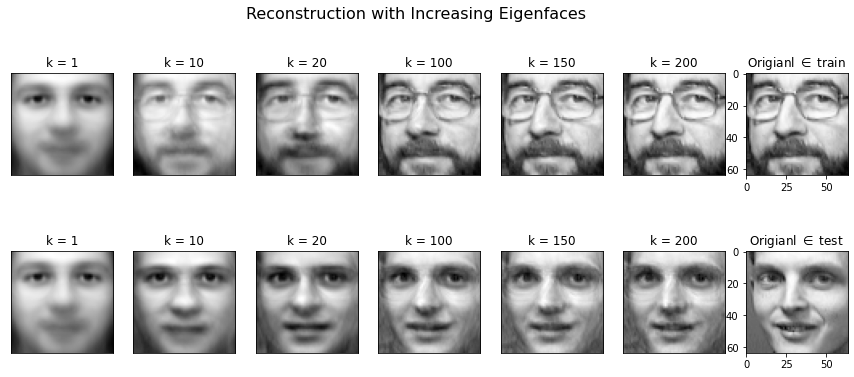

In [65]:
fig, axs = plt.subplots(figsize=(15,6))
mean_faces = np.mean(X, axis=0)

first_img = X[-1,:] 
second_img = X_test[-1,:] 

def construct(image, k):
    A = eigen_faces[:,:k]
    projected_face = (image - mean_faces) @ A 
    projected_face = projected_face @ A.T
    projected_face = projected_face + mean_faces
    return projected_face

for i, k in enumerate([0,9,19,99,149,199]):
    # first image
    ax = plt.subplot(2,7,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(vector2image(construct(first_img, k)),cmap='gray')
    plt.xticks([])
    plt.yticks([])

    # second image
    ax = plt.subplot(2,7,i+8)
    ax.set_title("k = "+str(k+1))
    plt.imshow(vector2image(construct(second_img, k)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
# first image
ax = plt.subplot(2,7,7)
ax.set_title("Origianl $\in$ train")
plt.imshow(vector2image(first_img),cmap='gray')

# second image
ax = plt.subplot(2,7,14)
ax.set_title("Origianl $\in$ test")
plt.imshow(vector2image(second_img),cmap='gray')

fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16)
plt.show()

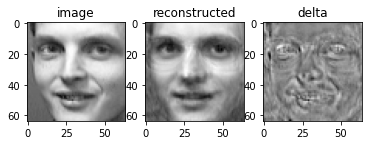

In [92]:
img = X_test[-1,:]
constructed_img =construct(img,200)
ax = plt.subplot(1,3,1)
ax.set_title("image")
plt.imshow(vector2image(img),cmap='gray')
ax = plt.subplot(1,3,2)
ax.set_title("reconstructed")
plt.imshow(vector2image(constructed_img),cmap='gray')
ax = plt.subplot(1,3,3)
ax.set_title("delta")
plt.imshow(vector2image(img - constructed_img),cmap='gray')

In [97]:
reconstructed_X = construct(X_test, 200)
delta_construction_error = (X_test - reconstructed_X) ** 2

In [98]:
delta_construction_error_sum = np.sum(delta_construction_error, axis=1)
print("mean", np.mean(delta_construction_error_sum))
print("std", np.std(delta_construction_error_sum))

mean 804369.1970349901
std 366377.1719061012
